In [136]:
import numpy as np
import pandas as pd
from ares import adaptive_resampling_index
import matplotlib.pyplot as plt

In [129]:
def raw_data(**input_kwargs):
    kwargs = dict(
        seed=0,
        n=100,
        tmax=1,
        gamma=0,
        f0=1.,
        a0=1.,
        f_mult = 4,
        a_mult = 0.5,
        components = 10
    )
    kwargs.update(input_kwargs)
    np.random.seed(kwargs['seed'])
    t = np.linspace(0, kwargs['tmax'], num=kwargs['n'])
    x = np.exp(kwargs['gamma']*t)
    f = kwargs['f0']
    a = kwargs['a0']
    for _ in range(kwargs['components']):
        x = x + a * np.sin(2 * np.pi * (f * t + np.random.rand()))
        f = f * kwargs['f_mult']
        a = a * kwargs['a_mult']
    return t, x

In [175]:
%%time
t, x = raw_data(n=1e6, f_mult=np.pi, a_mult=0.7)

CPU times: user 177 ms, sys: 14.1 ms, total: 192 ms
Wall time: 190 ms


/Users/igor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


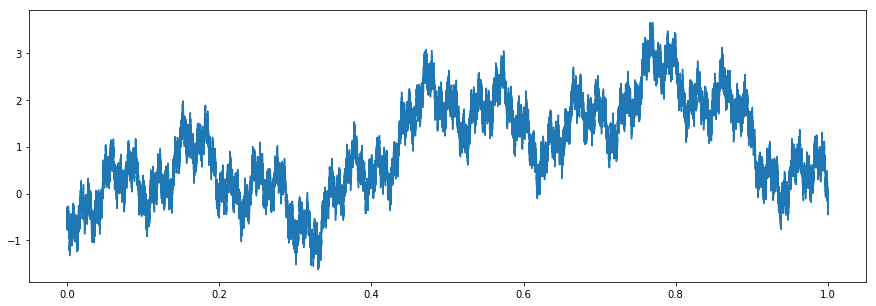

In [176]:
plt.figure(figsize=(15, 5))
plt.plot(t, x)

In [177]:
%%time
thresholds = [1, 0.5, 0.2,
              0.1, 0.05, 0.02,
              0.01, 0.005, 0.002,
              0.001, 0.0005, 0.0002]
index = adaptive_resampling_index(x, thresholds=thresholds, verbose=True)

Target threshold:  1
- error:  3.9434664214656108
- error:  2.974204756168896
- error:  3.2552063862962246
- error:  3.6595858527500766
- error:  2.959363661109117
- error:  2.5255409032538334
- error:  2.193527723500365
- error:  1.679728896591421
- error:  1.6160572523732206
- error:  1.7148925984833763
- error:  1.6708189381071323
- error:  1.192081726549176
- error:  0.9984498470101859
Target threshold:  0.5
- error:  0.9984498470101859
- error:  1.2631242693862117
- error:  1.0885152410263967
- error:  1.1502120291216298
- error:  0.8141499662873666
- error:  0.8181440726463622
- error:  0.7287948009844798
- error:  0.6938578772005255
- error:  0.4927297628625005
Target threshold:  0.2
- error:  0.4927297628625005
- error:  0.6739206674559847
- error:  0.5148921599041534
- error:  0.5672813680643827
- error:  0.4887129563381907
- error:  0.477546461684343
- error:  0.3106668904684835
- error:  0.308655592210254
- error:  0.29065669138034833
- error:  0.23493324826149653
- error:  

In [181]:
df = pd.DataFrame({'t': t, 'x': x, 'ares': index})

In [182]:
df.to_hdf('data/demo1e6.hdf', 'data')

In [183]:
!ls -la data/

total 750056
drwxr-xr-x   6 igor  staff        192  3 Jun 14:12 .
drwxr-xr-x  18 igor  staff        576  3 Jun 14:11 ..
drwxr-xr-x   2 igor  staff         64  3 Jun 13:02 .ipynb_checkpoints
-rw-r--r--   1 igor  staff   32007192  3 Jun 14:12 demo1e6.hdf
-rw-r--r--   1 igor  staff   32009240  3 Jun 14:12 demo1e6_raw.hdf
-rw-r--r--   1 igor  staff  320007192  3 Jun 13:50 demo1e7.hdf


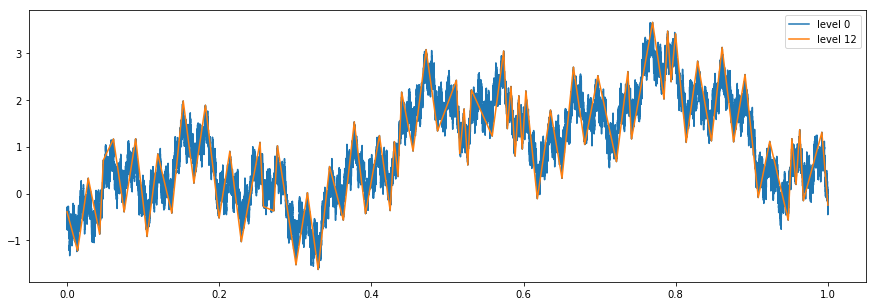

In [187]:
plt.figure(figsize=(15, 5))
for level in [0, 12]:
    idx = df['ares'] >= level
    plt.plot(df['t'][idx], df['x'][idx], label='level {}'.format(level))
plt.legend()